In [99]:
using Printf, Statistics, Random, Distributions
include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [100]:
using Plots

gr(size=(480,320))
default(fmt = :svg)

# Task 1 (done)

Generate 10000 values of $x=z-2$ where $z$ has a `Chisq(2)` distribution. Show a histogram (with bins from at least -3 to 6) and comment on whether the distribution looks normal. Add the pdf of $x$. 

Notice that the (population) mean and standard deviation of a `Chisq(n)` variable are $\mu=n$ and $\sigma=\sqrt{2n}$.

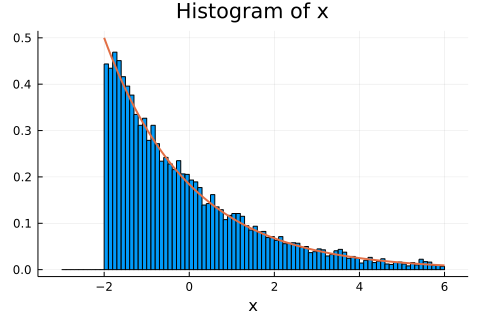

estimated mean and std:     -0.002               1.950

strongly non-normal


In [101]:
Random.seed!(123)                            #so the same random numbers are drawn 
                                             #each time you run this cell
x = rand(Chisq(2),10_000) .- 2

printlnPs("estimated mean and std: ",mean(x)," ",std(x))

zGrid = range(0,8,length=101)

p1 = histogram( x,bins = -3:0.1:6,
                normalized = true, 
                legend=false,
                title = "Histogram of x",
                xlabel = "x" )
plot!(zGrid.-2,pdf(Chisq(2),zGrid),linewidth=2)   #pdf(x) value equals pdf(z) value, where x=z-2
display(p1)

printred("\nstrongly non-normal")

# Task 2: Law of Large Numbers


Use the $x$ series above and calculate the average of the first $s$ observations. Do this for $s=1$, $s=2$, ..., $s=2000$. Plot the averages (on the vertical axis) against $s$ (on the horizontal axis).

Hint: `cumsum()` or a loop over `s`.

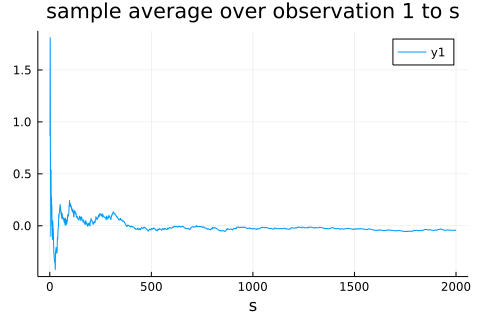

In [102]:
avg_s = cumsum(x)./(1:10_000)

plot(1:2000, avg_s[1:2000], xlabel="s", title="sample average over observation 1 to s")

# Task 3

(a) Code up a function `SimulateAvg(T,NSim)` which calculates `NSim` different sample averages from `NSim` different samples of length `T` where the data is drawn from $x=z-2$ where $z$ has a `Chisq(2)` distribution. 

(b) Simulate 10000 samples of length 5, and estimate the average of x in each sample. Plot a histogram over the averages, using the bins `-3:0.1:3`. Repeat for sample lengths of 25, 100 and 1000.

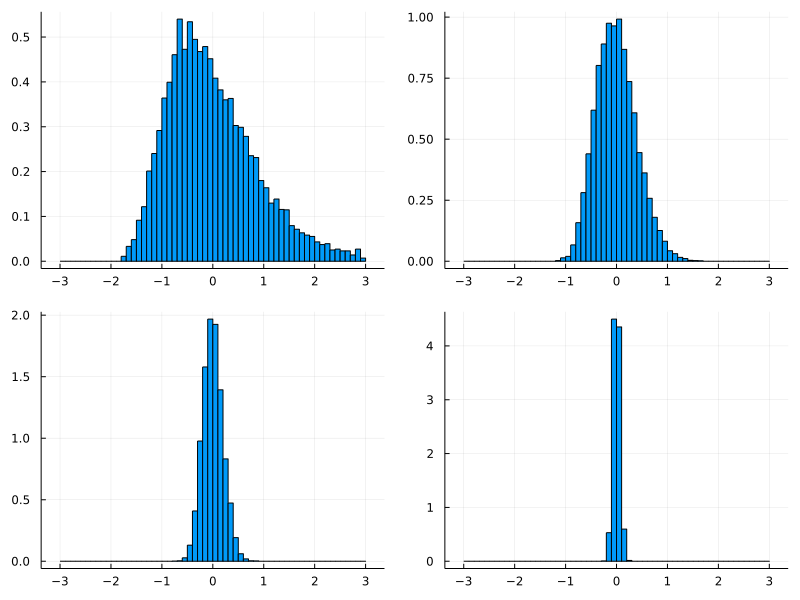

In [103]:
function SimulateAvg(T, NSim)
    # Create an array with NSim elements and initialize it with the value NaN. This is bc of if we don't put a number in it later, we will receive an error on the next computation
    avg = fill(NaN, NSim)
    for i = 1:NSim
        x_1 = rand(Chisq(2),T) .- 2
        avg[i] = mean(x_1)
    end
    
    return avg
end

NSim = 10_000

avg_5 = SimulateAvg(5, NSim)
avg_25 = SimulateAvg(25, NSim)
avg_100 = SimulateAvg(100, NSim)
avg_1000 = SimulateAvg(1000, NSim)

# printmat(avg_5)

function getHistogram(values)
    return histogram(values, 
                        bins = -3:0.1:3,
                        normalized = true, legend=false )
end

plot(getHistogram(avg_5), getHistogram(avg_25), getHistogram(avg_100), getHistogram(avg_1000), layout = (2,2), size=(800, 600))

# Task 4: Central Limit Theorem

Multiply each averages (calculated above) with the square root of the sample size (5, 25, 100, or 1000) and divide by $\sigma$ (to get $\sqrt{T} \bar{x} /\sigma$) and plot histograms again. In each subplot, add the pdf of a N$(0,1)$ variable. Recall that $\sigma=2$.

Notice $\sqrt{T} \bar{x}$ should converge to a normally distributed variable (with a zero mean since $x$ has). Dividing by $\sigma$ should make it a standard normal.

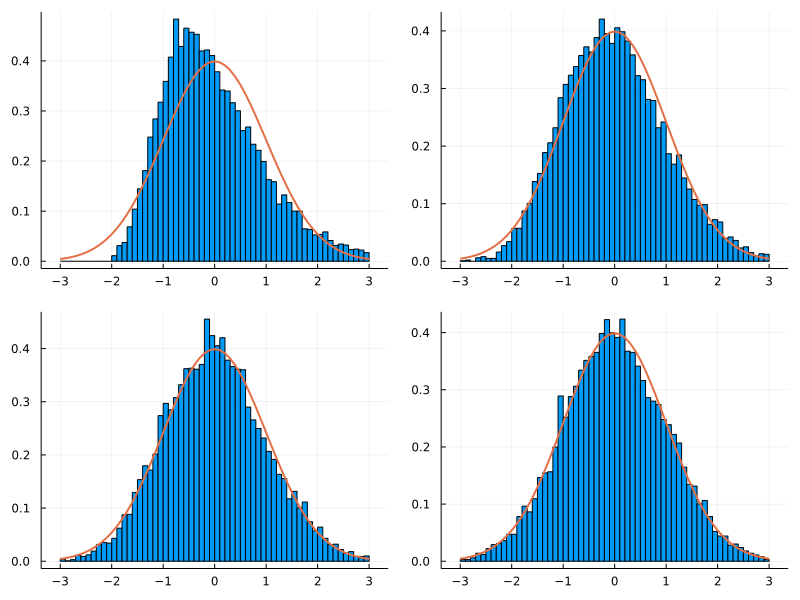

In [115]:
σ = 2
pdfN01 = pdf(Normal(0,1), -3:0.1:3)

function getHistogramWithPdf(values)
    p = histogram(values, 
            bins = -3:0.1:3,
            normalized = true,
            legend=false 
        )
    plot!(-3:0.1:3, pdfN01, linewidth=2)
    return p
end

plot(getHistogramWithPdf(avg_5 * sqrt(5) / σ),
        getHistogramWithPdf(avg_25 * sqrt(25) / σ),
        getHistogramWithPdf(avg_100 * sqrt(100) / σ),
        getHistogramWithPdf(avg_1000 * sqrt(1000) / σ),
        layout = (2,2),
        size = (800,600)
    )